<a href="https://colab.research.google.com/github/pyratlib/pyrat/blob/main/PyRAT_Mice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyRAT example

This notebook has examples of using the library to extract metrics of mice in Elevated Plus Maze task. The data is stored on https://github.com/ETHZ-INS/DLCAnalyzer. This dataset was developed by Sturman et al., 2020; and their publication can be found in https://www.nature.com/articles/s41386-020-0776-y#Sec29. 


For more details: https://github.com/pyratlib/pyrat

In [3]:
#@title Installing PyRAT and downloading data.
!pip install pyratlib
!pip install wget
!pip install unrar
!git clone https://github.com/ETHZ-INS/DLCAnalyzer

import pyratlib as rat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from scipy import signal
from IPython.display import clear_output 

clear_output()

In [5]:
#@title Load data

directory = '/content/DLCAnalyzer/data/EPM/Output_DLC'

lista = []

for filename in os.listdir(directory):
    if filename.startswith("EPM") and filename.endswith(".csv"): 
         lista.append(os.path.join(directory, filename))

lista.sort()

df01 = pd.read_csv(lista[0])
df02 = pd.read_csv(lista[1])
df03 = pd.read_csv(lista[2])
df04 = pd.read_csv(lista[3])
df05 = pd.read_csv(lista[4])
df06 = pd.read_csv(lista[5])
df07 = pd.read_csv(lista[6])
df08 = pd.read_csv(lista[7])
df09 = pd.read_csv(lista[8])
df10 = pd.read_csv(lista[9])
df11 = pd.read_csv(lista[10])
df12 = pd.read_csv(lista[11])
df13 = pd.read_csv(lista[12])
df14 = pd.read_csv(lista[13])
df15 = pd.read_csv(lista[14])
df16 = pd.read_csv(lista[15])
df17 = pd.read_csv(lista[16])
df18 = pd.read_csv(lista[17])
df19 = pd.read_csv(lista[18])
df20 = pd.read_csv(lista[19])
df21 = pd.read_csv(lista[20])
df22 = pd.read_csv(lista[21])
df23 = pd.read_csv(lista[22])
df24 = pd.read_csv(lista[23])


data = [df01,df02,df03,df04,df05,df06,df07,df08,
        df09,df10,df11,df12,df13,df14,df15,df16,
        df17,df18,df19,df20,df21,df22,df23,df24]

data_df = pd.read_csv(lista[0])

for i in range(1,24):
    temp = pd.read_csv(lista[i])  
    data_df = data_df.append(temp[2:],ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Mice example <a name="mice"></a>

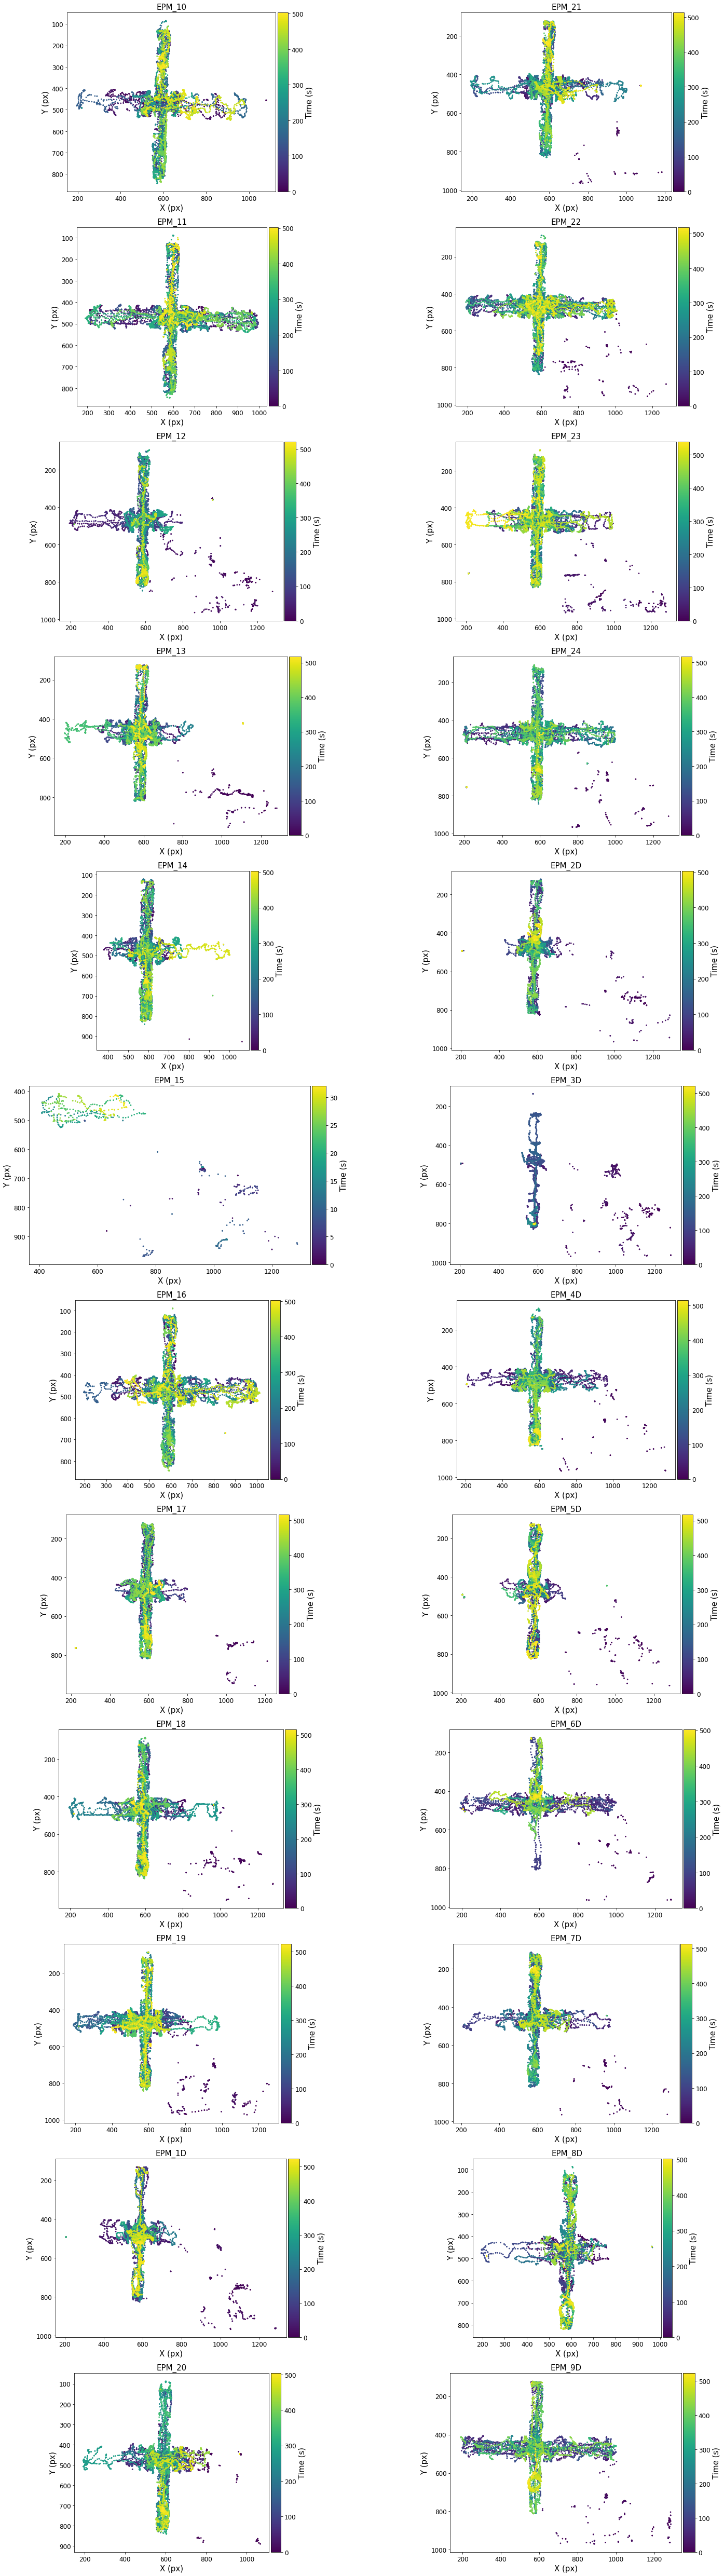

In [6]:
#@title Tracking plot
fig, axs = plt.subplots(12, 2,figsize=(25,90))

for i in range(12):
    rat.Trajectory(data[i], 'nose',figureTitle = lista[i][41:47],ax=axs[i][0], fig=fig)
    rat.Trajectory(data[i+12], 'nose',figureTitle = lista[i+12][41:47],ax=axs[i][1], fig=fig)

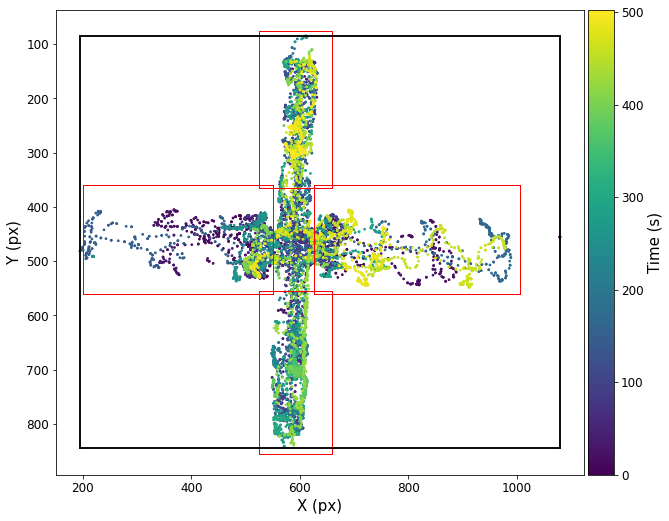

In [12]:
#@title Creating the arms in the pixel space
fig, axs = plt.subplots( 1, 1,figsize=(10,10))

posições = {
            'open_left':  [1,0,0,0,200 ,360  ,350 ,200 ],
            'open_right':  [1,0,0,0,626 ,360  ,380 ,200 ],
            'center':   [1,0,0,0,551 ,365  ,75  ,190 ],
            'close_up': [1,0,0,0,525 ,75   ,135 ,290 ],
            'close_down': [1,0,0,0,525 ,555  ,135 ,300 ]
            }
obj = rat.FieldDetermination(posit = posições,plot=True,data=data[0],bodyPartBox='nose')

rat.FieldDetermination(posit = posições,plot=True,data=data[0],bodyPartBox='nose',ax =axs, ret=False)
rat.Trajectory(data[0], 'nose',ax=axs, fig=fig)
plt.show()

In [58]:
#@title Time in EPM

#The code is long because the data are of different sizes (e.g. EPM_5).

mean_obj1 = []
mean_obj2 = []
mean_obj3 = []
mean_obj4 = []
mean_obj5 = []
mean_obj6 = []

time_obj1 = []
time_obj2 = []
time_obj3 = []
time_obj4 = []
time_obj5 = []
time_obj6 = []

for i in range(len(data)):
    interação1,_ = rat.Interaction(data[i],'nose',obj,fps=25)
    try:
        mean_obj1.append(interação1['obj'].value_counts()[0])
    except KeyError:
        mean_obj1.append(0)
    try:
        time_obj1.append((interação1.end.loc[interação1.obj == 0] - interação1.start.loc[interação1.obj == 0]).sum())
    except KeyError:
        time_obj1.append(0)
    try:
        mean_obj2.append(interação1['obj'].value_counts()[1])
    except KeyError:
        mean_obj2.append(0)
    try:
        time_obj2.append((interação1.end.loc[interação1.obj == 1] - interação1.start.loc[interação1.obj == 1]).sum())
    except KeyError:
        time_obj2.append(0)
    try:
        mean_obj3.append(interação1['obj'].value_counts()[2])
    except KeyError:
        mean_obj3.append(0)
    try:
        time_obj3.append((interação1.end.loc[interação1.obj == 2] - interação1.start.loc[interação1.obj == 2]).sum())
    except KeyError:
        time_obj3.append(0)
    try:
        mean_obj4.append(interação1['obj'].value_counts()[3])
    except KeyError:
        mean_obj4.append(0)
    try:
        time_obj4.append((interação1.end.loc[interação1.obj == 3] - interação1.start.loc[interação1.obj == 3]).sum())
    except KeyError:
        time_obj4.append(0)
    try:
        mean_obj5.append(interação1['obj'].value_counts()[4])
    except KeyError:
        mean_obj5.append(0)
    try:
        time_obj5.append((interação1.end.loc[interação1.obj == 4] - interação1.start.loc[interação1.obj == 4]).sum())
    except KeyError:
        time_obj5.append(0)
    try:
        mean_obj6.append(interação1['obj'].value_counts()[5])
    except KeyError:
        mean_obj6.append(0)
    try:
        time_obj6.append((interação1.end.loc[interação1.obj == 5] - interação1.start.loc[interação1.obj == 5]).sum())
    except KeyError:
        time_obj6.append(0)

for i in range(len(data)):
  print(lista[i][41:47],
        'Open arm: ', time_obj1[i] + time_obj2[i],
        'Center: ',time_obj3[i],'\n',
        'Closed arm: ', time_obj4[i]+time_obj5[i],
        'Closed arm + center: ', time_obj4[i]+time_obj5[i]+time_obj3[i],
        'Out (manipulation + errors): ',time_obj1[i],
        'Total: ', time_obj1[i] + time_obj2[i] + time_obj3[i] + time_obj4[i] + time_obj5[i] + time_obj6[i] 
        )
  
print('\n','Closed arm mean: ',np.mean(np.asarray(time_obj4) + np.asarray(time_obj5) + np.asarray(time_obj6)) ,'sd: ',np.std(np.asarray(time_obj4) + np.asarray(time_obj5) + np.asarray(time_obj6)) ,
      '\n','Open arm mean: ',np.mean(np.asarray(time_obj2) + np.asarray(time_obj3)),'sd: ',np.std(np.asarray(time_obj2) + np.asarray(time_obj3)) )

EPM_10 Open arm:  87.71999999999997 Center:  94.5199999999999 
 Closed arm:  198.36000000000013 Closed arm + center:  292.88 Out (manipulation + errors):  0.8799999999999351 Total:  603.16
EPM_11 Open arm:  99.04 Center:  169.35999999999987 
 Closed arm:  160.84000000000015 Closed arm + center:  330.20000000000005 Out (manipulation + errors):  2.960000000000032 Total:  603.0
EPM_12 Open arm:  89.6000000000001 Center:  61.399999999999906 
 Closed arm:  127.84000000000029 Closed arm + center:  189.24000000000018 Out (manipulation + errors):  30.68000000000006 Total:  624.44
EPM_13 Open arm:  172.8 Center:  101.2799999999999 
 Closed arm:  249.56000000000006 Closed arm + center:  350.84 Out (manipulation + errors):  61.679999999999964 Total:  621.24
EPM_14 Open arm:  67.84000000000007 Center:  77.60000000000008 
 Closed arm:  241.1599999999998 Closed arm + center:  318.7599999999999 Out (manipulation + errors):  0.8799999999999892 Total:  603.1600000000001
EPM_15 Open arm:  27.48000000000

In [56]:
#@title Distance in EPM
dist = []
for i in range(len(data)):
    if i == 5:
        dist.append(2000)
    else:
        dist.append(rat.MotionMetrics(data[i], 'bodycentre', filter=100, fps=25).Distance.sum())
print('Mean distance: ',np.mean(dist),'sd: ', np.std(dist))

Mean distance:  1901.3641358577463 sd:  509.3991930356842
